# **Artizence Technical Assessment**
***Goal: Build a full-stack IPL Cricket Match Prediction System with ML, LLMs, APIs, scraping, and optional frontend.***

***Core Features: Predict match outcomes, team scores, and player metrics; provide reasoning using LLMs; interact via chatbot.***

Task-1

Loading the dataset.

Required libaries and Frameworks

In [25]:
# Data manipulation
import pandas as pd
import numpy as np
# Preprocessing and modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier


In [2]:
# Load the CSVs
matches = pd.read_csv('/content/matches.csv')
deliveries = pd.read_csv('/content/deliveries.csv')




In [3]:
# Preview data
print("Matches shape:", matches.shape)
print("Deliveries shape:", deliveries.shape)

# Show first few rows
matches.head()

Matches shape: (1095, 20)
Deliveries shape: (260920, 17)


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


**Step-I**

**DATA CLEANING**

Missing values

In [4]:
# Check for missing values
matches.isnull().sum()

,0
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


In [5]:
# Show the actual rows that contain NaN in top 10
matches.head(10)[matches.head(10).isnull().any(axis=1)]


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
5,335987,2007/08,Jaipur,2008-04-21,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,167.0,20.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,2007/08,Hyderabad,2008-04-22,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,143.0,20.0,N,NaN,IL Howell,AM Saheba
7,335989,2007/08,Chennai,2008-04-23,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,209.0,20.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,2007/08,Hyderabad,2008-04-24,League,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,215.0,20.0,N,NaN,Asad Rauf,MR Benson
9,335991,2007/08,Chandigarh,2008-04-25,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,183.0,20.0,N,NaN,Aleem Dar,AM Saheba


In [6]:
# Fix known issues in top rows
matches['city'] = matches['city'].fillna("Unknown")
matches['player_of_match'] = matches['player_of_match'].fillna("Unknown")

# Optional: If any top-row entries are still missing and critical → drop them
matches = matches.dropna(subset=['team1', 'team2', 'winner', 'venue', 'date'])

# Confirm no NaNs in top rows
print("NaN check in top 10 rows:")
print(matches.head(10).isnull().sum())


NaN check in top 10 rows:
id                  0
season              0
city                0
date                0
match_type          0
player_of_match     0
venue               0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              0
result              0
result_margin       0
target_runs         0
target_overs        0
super_over          0
method             10
umpire1             0
umpire2             0
dtype: int64


In [7]:
# Fill missing method values
matches['method'] = matches['method'].fillna("Normal")

# Confirm fix
print("Nulls in 'method' after filling:", matches['method'].isnull().sum())
matches['method'].value_counts()


Nulls in 'method' after filling: 0


,count
method,
Normal,1069
D/L,21


In [8]:
deliveries = pd.read_csv('/content/deliveries.csv')

print("Shape:", deliveries.shape)
deliveries.head()


Shape: (260920, 17)


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [9]:
deliveries.isnull().sum()


,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [10]:
# Fill with 'None' where applicable for categorical safety
deliveries['extras_type'] = deliveries['extras_type'].fillna('None')
deliveries['player_dismissed'] = deliveries['player_dismissed'].fillna('None')
deliveries['dismissal_kind'] = deliveries['dismissal_kind'].fillna('None')
deliveries['fielder'] = deliveries['fielder'].fillna('None')

# Confirm cleanup
print("✅ After cleaning, null counts:")
print(deliveries.isnull().sum())


✅ After cleaning, null counts:
match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


In [11]:
# Convert to category
categorical_cols = ['extras_type', 'player_dismissed', 'dismissal_kind', 'fielder']
for col in categorical_cols:
    deliveries[col] = deliveries[col].astype('category')


Feature Engineering

We’ll use features like:

Toss Winner

Venue

Team 1 and Team 2

In [12]:
# Keep only relevant columns
df = matches[['team1', 'team2', 'toss_winner', 'venue', 'winner']]

# Remove rows with no result
df = df[df['winner'].notnull()]


In [13]:
le = LabelEncoder()

for col in ['team1', 'team2', 'toss_winner', 'venue', 'winner']:
    df[col] = le.fit_transform(df[col])


In [14]:
from sklearn.model_selection import train_test_split

X = df[['team1', 'team2', 'toss_winner', 'venue']]
y = df['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:

# Scale your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train again with more iterations
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=2000)

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)


In [17]:
# Calculate class weights
weights = class_weight.compute_class_weight(class_weight='balanced',
                                             classes=np.unique(y_train),
                                             y=y_train)
class_weights = dict(zip(np.unique(y_train), weights))

# Re-train Random Forest with class weights
rf_balanced = RandomForestClassifier(n_estimators=100, class_weight=class_weights, random_state=42)
rf_balanced.fit(X_train, y_train)
rf_preds_bal = rf_balanced.predict(X_test)

# Re-evaluate
print("Balanced Random Forest Accuracy:", accuracy_score(y_test, rf_preds_bal))
print(classification_report(y_test, rf_preds_bal))


Balanced Random Forest Accuracy: 0.4541284403669725
              precision    recall  f1-score   support

           0       0.55      0.57      0.56        28
           1       0.25      0.17      0.20         6
           2       0.31      0.44      0.36         9
           3       0.42      0.38      0.40        13
           4       1.00      0.67      0.80         3
           5       0.56      0.83      0.67         6
           6       0.27      0.33      0.30        18
           7       0.00      0.00      0.00         1
           8       0.38      0.38      0.38        26
           9       0.57      0.80      0.67         5
          10       0.54      0.48      0.51        29
          11       0.00      0.00      0.00         2
          12       0.50      0.40      0.44         5
          13       0.39      0.32      0.35        22
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.48      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_preds))
print(classification_report(y_test, gb_preds))


Gradient Boosting Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.55      0.61      0.58        28
           1       0.20      0.17      0.18         6
           2       0.36      0.44      0.40         9
           3       0.45      0.38      0.42        13
           4       1.00      0.33      0.50         3
           5       0.75      1.00      0.86         6
           6       0.33      0.33      0.33        18
           7       0.00      0.00      0.00         1
           8       0.50      0.58      0.54        26
           9       0.00      0.00      0.00         5
          10       0.56      0.62      0.59        29
          11       0.00      0.00      0.00         2
          12       0.25      0.20      0.22         5
          13       0.45      0.41      0.43        22
          14       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         1
          16       0.56      0.43      0.49      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
cm = confusion_matrix(y_test, rf_preds_bal)  # if using the balanced RF model


SMOTE or ADASYN used.

In [20]:
sm = SMOTE(random_state=42, k_neighbors=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


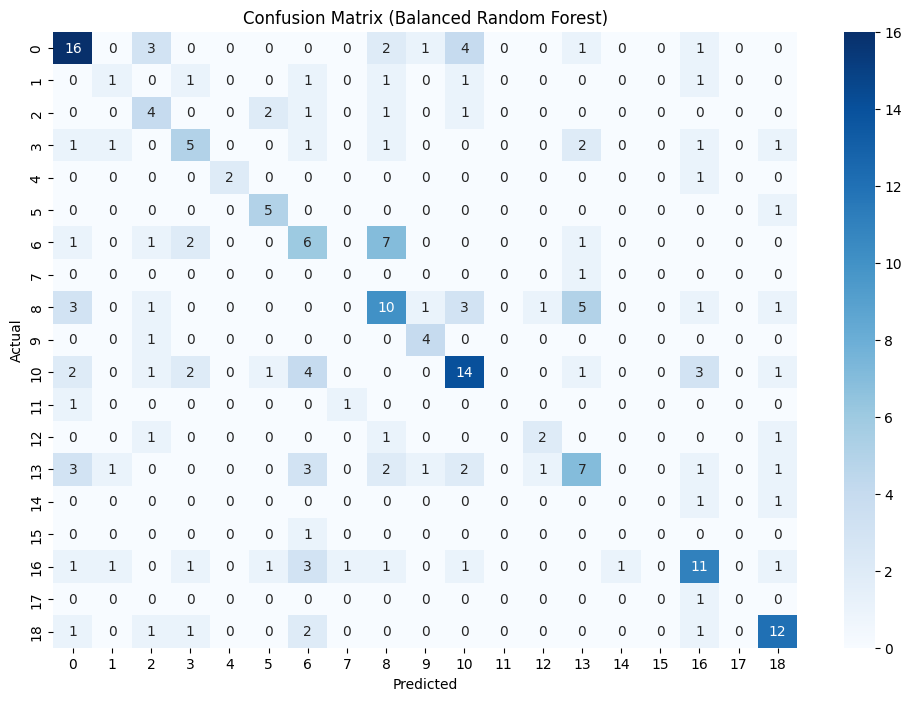

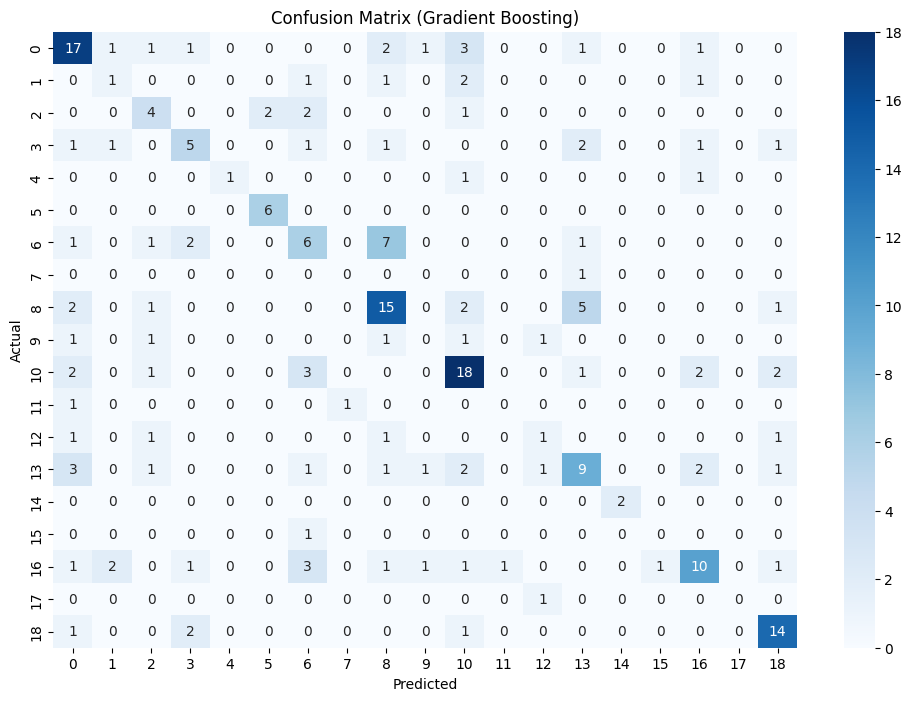

In [21]:
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix ({model_name})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(y_test, rf_preds_bal, "Balanced Random Forest")
plot_conf_matrix(y_test, gb_preds, "Gradient Boosting")


SMOTE Random Forest Accuracy: 0.44954128440366975
              precision    recall  f1-score   support

           0       0.58      0.54      0.56        28
           1       0.25      0.17      0.20         6
           2       0.36      0.56      0.43         9
           3       0.42      0.38      0.40        13
           4       1.00      0.67      0.80         3
           5       0.62      0.83      0.71         6
           6       0.29      0.33      0.31        18
           7       0.00      0.00      0.00         1
           8       0.37      0.38      0.38        26
           9       0.50      0.80      0.62         5
          10       0.48      0.38      0.42        29
          11       0.00      0.00      0.00         2
          12       0.25      0.40      0.31         5
          13       0.38      0.27      0.32        22
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.57      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


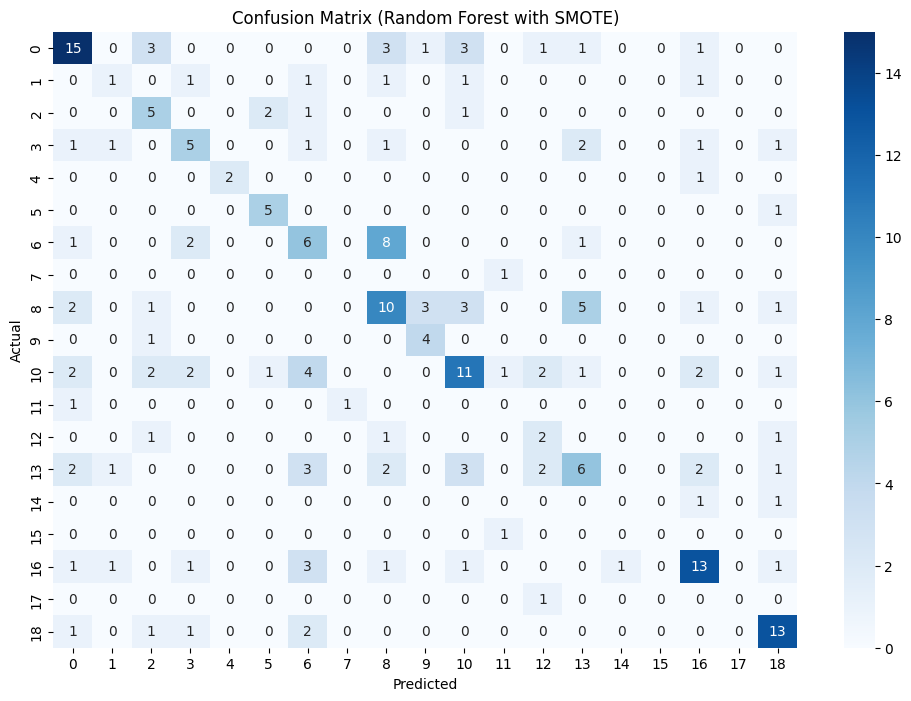

In [22]:
# Train model on resampled data
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_res, y_train_res)

# Predict on original test data
rf_preds_smote = rf_smote.predict(X_test)

# Evaluate
print("SMOTE Random Forest Accuracy:", accuracy_score(y_test, rf_preds_smote))
print(classification_report(y_test, rf_preds_smote))

# Optional: Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_preds_smote)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Random Forest with SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [23]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_smote, X_train_res, y_train_res, cv=skf, scoring='f1_weighted')
print("Weighted F1 (Stratified CV):", scores.mean())


Weighted F1 (Stratified CV): 0.7690132284710105


Hyperparameter Tuning with GridSearchCV

In [24]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,
                           scoring='f1_weighted', cv=3, n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

best_rf = grid_search.best_estimator_
rf_preds_smote = best_rf.predict(X_test)

print("Tuned RF Accuracy:", accuracy_score(y_test, rf_preds_smote))
print(classification_report(y_test, rf_preds_smote))


Tuned RF Accuracy: 0.4541284403669725
              precision    recall  f1-score   support

           0       0.59      0.57      0.58        28
           1       0.25      0.17      0.20         6
           2       0.31      0.56      0.40         9
           3       0.42      0.38      0.40        13
           4       1.00      0.67      0.80         3
           5       0.62      0.83      0.71         6
           6       0.27      0.33      0.30        18
           7       0.00      0.00      0.00         1
           8       0.42      0.38      0.40        26
           9       0.50      0.80      0.62         5
          10       0.48      0.34      0.40        29
          11       0.00      0.00      0.00         2
          12       0.29      0.40      0.33         5
          13       0.39      0.32      0.35        22
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.57      0.57      0.57

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SMOTE + Gradient Boosting

In [26]:
gb_clf = HistGradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_res, y_train_res)

gb_preds = gb_clf.predict(X_test)
print("SMOTE + GB Accuracy:", accuracy_score(y_test, gb_preds))
print(classification_report(y_test, gb_preds))


SMOTE + GB Accuracy: 0.48623853211009177
              precision    recall  f1-score   support

           0       0.55      0.57      0.56        28
           1       0.33      0.17      0.22         6
           2       0.38      0.33      0.35         9
           3       0.42      0.38      0.40        13
           4       0.00      0.00      0.00         3
           5       0.80      0.67      0.73         6
           6       0.29      0.39      0.33        18
           7       0.00      0.00      0.00         1
           8       0.45      0.54      0.49        26
           9       0.50      0.60      0.55         5
          10       0.52      0.55      0.53        29
          11       1.00      0.50      0.67         2
          12       0.50      0.60      0.55         5
          13       0.33      0.27      0.30        22
          14       0.50      0.50      0.50         2
          15       0.00      0.00      0.00         1
          16       0.62      0.57      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


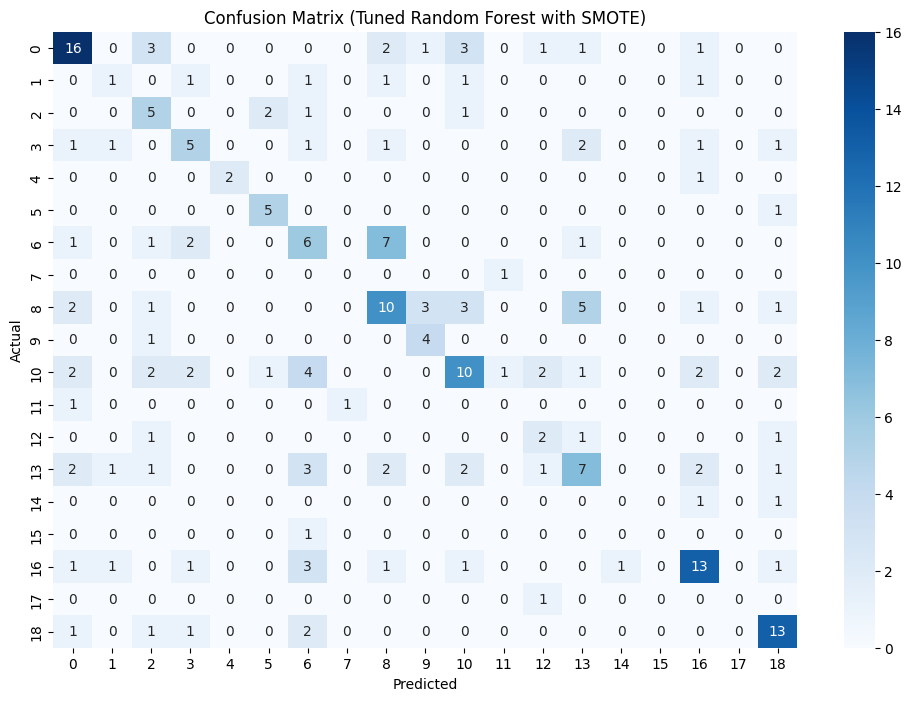

In [27]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix ({title})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(y_test, rf_preds_smote, "Tuned Random Forest with SMOTE")


SMOTE only inside CV folds

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.pipeline import Pipeline

smote = SMOTE(random_state=42, k_neighbors=1)  # safer for small classes
gb_clf = HistGradientBoostingClassifier(random_state=42)

pipeline = Pipeline([
    ('smote', smote),
    ('model', gb_clf)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1_weighted')

print("Cross-validated Weighted F1:", scores.mean())


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-validated Weighted F1: 0.5045015641670697


In [32]:
from collections import Counter
print(Counter(y_train))


Counter({10: 115, 0: 110, 8: 105, 16: 93, 13: 90, 18: 70, 6: 70, 3: 54, 2: 39, 1: 23, 5: 22, 9: 19, 12: 19, 11: 10, 4: 10, 14: 8, 17: 6, 7: 5, 15: 4})


In [34]:
# Merge rare classes into 'Other' (label 99)
threshold = 10
y_train_cleaned = np.array([label if Counter(y_train)[label] >= threshold else 99 for label in y_train])


In [35]:
gb_clf = HistGradientBoostingClassifier(class_weight='balanced', random_state=42)

pipeline = Pipeline([
    ('model', gb_clf)
])


In [36]:
from collections import Counter
import numpy as np

# Set a threshold: classes with fewer than 10 samples will be merged into 'Other' class (label 99)
threshold = 10
y_train_cleaned = np.array([label if Counter(y_train)[label] >= threshold else 99 for label in y_train])


In [37]:
# Optionally drop 'Other' class if you want to completely ignore rare classes:
X_train_filtered = X_train[y_train_cleaned != 99]
y_train_filtered = y_train_cleaned[y_train_cleaned != 99]


In [38]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline

# Updated classifier using class weights
gb_clf = HistGradientBoostingClassifier(class_weight='balanced', random_state=42)

pipeline = Pipeline([
    ('model', gb_clf)
])

# Use StratifiedKFold with fewer splits
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Evaluate with cross-validation
scores = cross_val_score(pipeline, X_train_filtered, y_train_filtered, cv=cv, scoring='f1_weighted')

print("Cross-validated Weighted F1:", scores.mean())


Cross-validated Weighted F1: 0.49229599270147567


In [39]:
# Fit on full filtered training data
pipeline.fit(X_train_filtered, y_train_filtered)

# Predict and evaluate on test set
y_pred = pipeline.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy on test set: 0.481651376146789
              precision    recall  f1-score   support

           0       0.57      0.61      0.59        28
           1       0.40      0.33      0.36         6
           2       0.33      0.33      0.33         9
           3       0.38      0.38      0.38        13
           4       1.00      0.33      0.50         3
           5       0.71      0.83      0.77         6
           6       0.31      0.44      0.36        18
           7       0.00      0.00      0.00         1
           8       0.50      0.46      0.48        26
           9       0.43      0.60      0.50         5
          10       0.53      0.55      0.54        29
          11       0.00      0.00      0.00         2
          12       0.20      0.20      0.20         5
          13       0.40      0.36      0.38        22
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.56      0.43      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
# Drop classes with very low support in train and test
rare_classes = [7, 11, 14, 15, 17]
mask = ~np.isin(y_test, rare_classes)
X_test_filtered = X_test[mask]
y_test_filtered = y_test[mask]

# Rerun prediction and report
y_pred_filtered = pipeline.predict(X_test_filtered)
print(classification_report(y_test_filtered, y_pred_filtered))


              precision    recall  f1-score   support

           0       0.59      0.61      0.60        28
           1       0.40      0.33      0.36         6
           2       0.33      0.33      0.33         9
           3       0.38      0.38      0.38        13
           4       1.00      0.33      0.50         3
           5       0.71      0.83      0.77         6
           6       0.32      0.44      0.37        18
           8       0.50      0.46      0.48        26
           9       0.43      0.60      0.50         5
          10       0.55      0.55      0.55        29
          12       0.25      0.20      0.22         5
          13       0.42      0.36      0.39        22
          16       0.59      0.43      0.50        23
          18       0.64      0.78      0.70        18

    accuracy                           0.50       211
   macro avg       0.51      0.48      0.48       211
weighted avg       0.50      0.50      0.50       211



In [41]:
from sklearn.model_selection import GridSearchCV

params = {
    'model__max_iter': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__l2_regularization': [0.0, 0.1, 1.0]
}

grid = GridSearchCV(pipeline, param_grid=params, cv=3, scoring='f1_weighted', verbose=1)
grid.fit(X_train_filtered, y_train_filtered)

print("Best parameters:", grid.best_params_)
print("Best CV F1 Score:", grid.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'model__l2_regularization': 0.0, 'model__learning_rate': 0.1, 'model__max_iter': 100}
Best CV F1 Score: 0.5343020184645662


<Figure size 1000x800 with 0 Axes>

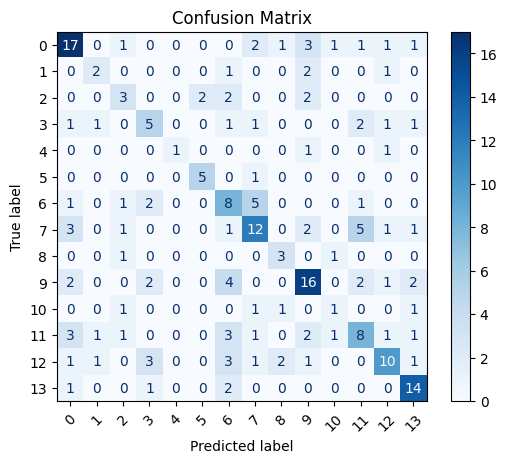

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_filtered, y_pred_filtered)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.figure(figsize=(10, 8))  # Set the figure size here
disp.plot(cmap='Blues', xticks_rotation=45)  # Optional: better color + x-axis readability
plt.title("Confusion Matrix")
plt.show()



Best Parameters
{
    'model__l2_regularization': 0.0,
    'model__learning_rate': 0.1,
    'model__max_iter': 100
}

In [48]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.50      0.50        28
           1       0.50      0.50      0.50         6
           2       0.12      0.11      0.12         9
           3       0.38      0.38      0.38        13
           4       1.00      0.33      0.50         3
           5       0.71      0.83      0.77         6
           6       0.29      0.39      0.33        18
           7       0.00      0.00      0.00         1
           8       0.46      0.50      0.48        26
           9       0.60      0.60      0.60         5
          10       0.52      0.52      0.52        29
          11       0.00      0.00      0.00         2
          12       0.33      0.40      0.36         5
          13       0.42      0.36      0.39        22
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.53      0.39      0.45        23
          17       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x800 with 0 Axes>

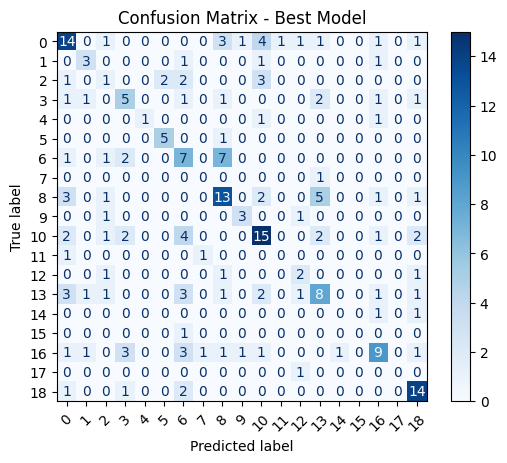

In [49]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Best Model")
plt.show()


<Figure size 1000x800 with 0 Axes>

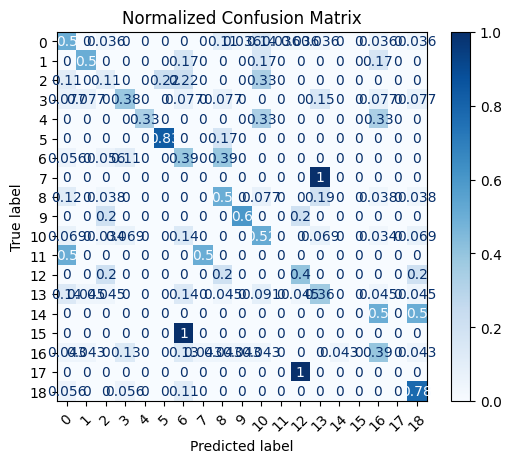

In [54]:
cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Normalized Confusion Matrix")
plt.show()


In [55]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight='balanced')


In [56]:
from sklearn.multiclass import OneVsRestClassifier
model = OneVsRestClassifier(HistGradientBoostingClassifier())


In [57]:
from imblearn.over_sampling import BorderlineSMOTE
sampler = BorderlineSMOTE(k_neighbors=1)


Cross-validated Weighted F1: 0.5159720405638655

Accuracy on test set: 0.46543778801843316
              precision    recall  f1-score   support

           0       0.57      0.61      0.59        28
           1       0.50      0.50      0.50         6
           2       0.30      0.33      0.32         9
           3       0.36      0.38      0.37        13
           4       1.00      0.33      0.50         3
           5       0.71      0.83      0.77         6
           6       0.29      0.39      0.33        18
           7       0.00      0.00      0.00         1
           8       0.50      0.46      0.48        26
           9       0.43      0.60      0.50         5
          10       0.54      0.52      0.53        29
          11       0.00      0.00      0.00         2
          12       0.20      0.20      0.20         5
          13       0.40      0.36      0.38        22
          14       0.00      0.00      0.00         2
          16       0.50      0.35      0.41 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


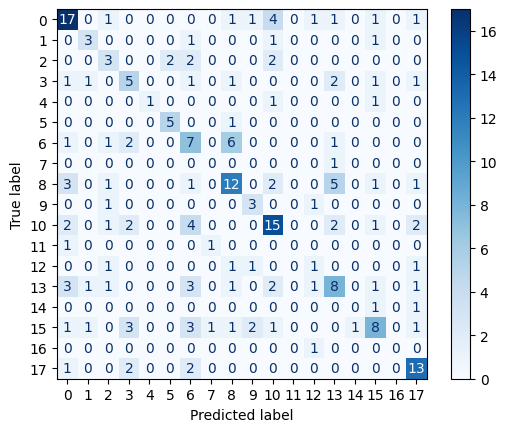

In [58]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

# STEP 1: Filter out classes with <5 samples
class_counts = Counter(y_train)
valid_classes = [cls for cls, count in class_counts.items() if count >= 5]

# Filter training data
mask_train = np.isin(y_train, valid_classes)
X_train_filtered = X_train[mask_train]
y_train_filtered = y_train[mask_train]

# Filter test data to evaluate consistently
mask_test = np.isin(y_test, valid_classes)
X_test_filtered = X_test[mask_test]
y_test_filtered = y_test[mask_test]

# STEP 2: Define classifier with class_weight balanced
clf = HistGradientBoostingClassifier(class_weight='balanced', random_state=42)

# STEP 3: Cross-validation (5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_train_filtered, y_train_filtered, cv=cv, scoring='f1_weighted')
print("Cross-validated Weighted F1:", scores.mean())

# STEP 4: Train and evaluate on test set
clf.fit(X_train_filtered, y_train_filtered)
y_pred = clf.predict(X_test_filtered)

# Classification report
print("\nAccuracy on test set:", clf.score(X_test_filtered, y_test_filtered))
print(classification_report(y_test_filtered, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test_filtered, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")  # removed `figsize` — not supported


In [59]:
from collections import Counter
all_y = np.concatenate([y_train, y_test])
class_counts = Counter(all_y)
rare_classes = [cls for cls, count in class_counts.items() if count < 5]

mask_train = ~np.isin(y_train, rare_classes)
mask_test = ~np.isin(y_test, rare_classes)
X_train_clean = X_train[mask_train]
y_train_clean = y_train[mask_train]
X_test_clean = X_test[mask_test]
y_test_clean = y_test[mask_test]


In [60]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='multi:softprob', num_class=len(np.unique(y_train_clean)),
                    scale_pos_weight=None, use_label_encoder=False, eval_metric='mlogloss')

xgb.fit(X_train_clean, y_train_clean)
y_pred = xgb.predict(X_test_clean)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:18:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [61]:
from collections import Counter
import numpy as np

# Assume y_train and y_test are already defined as numpy arrays
all_y = np.concatenate([y_train, y_test])
class_counts = Counter(all_y)

# Define rare classes (total count < 5)
rare_classes = [cls for cls, count in class_counts.items() if count < 5]
print("Rare classes to remove:", rare_classes)

# Filter them out from your train and test sets
mask_train = ~np.isin(y_train, rare_classes)
mask_test = ~np.isin(y_test, rare_classes)

X_train_filtered = X_train[mask_train]
y_train_filtered = y_train[mask_train]
X_test_filtered = X_test[mask_test]
y_test_filtered = y_test[mask_test]


Rare classes to remove: []
